# Обучение нейрона с помощью функции потерь LogLoss

<h3 style="text-align: center;"><b>Нейрон с сигмоидой</b></h3>

Снова рассмотрим нейрон с сигмоидой, то есть $$f(x) = \sigma(x)=\frac{1}{1+e^{-x}}$$ 

Ранее мы установили, что **обучение нейрона с сигмоидой с квадратичной функцией потерь**:  

$$MSE(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (\sigma(w \cdot x_i) - y_i)^2$$    

где $w \cdot x_i$ - скалярное произведение, а $\sigma(w \cdot x_i) =\frac{1}{1+e^{-w \cdot x_i}} $ - сигмоида -- **неэффективно**, то есть мы увидели, что даже за большое количество итераций нейрон предсказывает плохо.

Давайте ещё раз взглянем на формулу для градиентного спуска от функции потерь $MSE$ по весам нейрона:

$$ \frac{\partial MSE}{\partial w} = \frac{1}{n} X^T (\sigma(w \cdot X) - y)\sigma(w \cdot X)(1 - \sigma(w \cdot X))$$

А теперь смотрим на график сигмоиды:

<img src="https://cdn-images-1.medium.com/max/1200/1*IDAnCFoeXqWL7F4u9MJMtA.png" width=500px height=350px>

**Её значения: числа от 0 до 1.**

Если получше проанализировать формулу, то теперь можно заметить, что, поскольку сигмоида принимает значения между 0 и 1 (а значит (1-$\sigma$) тоже принимает значения от 0 до 1), то мы умножаем $X^T$ на столбец $(\sigma(w \cdot X) - y)$ из чисел от -1 до 1, а потом ещё на столбцы $\sigma(w \cdot X)$ и $(1 - \sigma(w \cdot X))$ из чисел от 0 до 1. Таким образом в лучшем случае $\frac{\partial{Loss}}{\partial{w}}$ будет столбцом из чисел, порядок которых максимум 0.01 (в среднем, понятно, что если сигмоида выдаёт все 0, то будет 0, если все 1, то тоже 0). После этого мы умножаем на шаг градиентного спуска, который обычно порядка 0.001 или 0.1 максимум. То есть мы вычитаем из весов числа порядка ~0.0001. Медленновато спускаемся, не правда ли? Это называют **проблемой затухающих градиентов**.

Чтобы избежать эту проблему в задачах классификации, в которых моделью является нейрон с сигмоидной функцией активации, предсказывающий "вероятности" принадлженостей к классамиспользуют **LogLoss**:  

$$J(\hat{y}, y) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) = -\frac{1}{n} \sum_{i=1}^n y_i \log(\sigma(w \cdot x_i)) + (1 - y_i) \log(1 - \sigma(w \cdot x_i))$$

где, как и прежде, $y$ - столбец $(n, 1)$ из истинных значений классов, а $\hat{y}$ - столбец $(n, 1)$ из предсказаний нейрона.

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [ ]:
def loss(y_pred, y):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

Отметим, что сейчас речь идёт именно о **бинарной классификации (на два класса)**, в многоклассовой классификации используется функция потерь под названием *кросс-энтропия*, которая является обобщением LogLoss'а на случай нескольких классов.

Почему же теперь всё будет лучше? Раньше была проблема умножения маленьких чисел в градиенте. Давайте посмотрим, что теперь:

* Для веса $w_j$:

$$ \frac{\partial Loss}{\partial w_j} = 
-\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)(\sigma(w \cdot x_i))_{w_j}' = -\frac{1}{n} \sum_{i=1}^n \left(\frac{y_i}{\sigma(w \cdot x_i)} - \frac{1 - y_i}{1 - \sigma(w \cdot x_i)}\right)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_{ij} = $$
$$-\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{ij}$$

* Градиент $Loss$'а по вектору весов -- это вектор, $j$-ая компонента которого равна $\frac{\partial Loss}{\partial w_j}$ (помним, что весов всего $m$):

$$\begin{align}
    \frac{\partial Loss}{\partial w} &= \begin{bmatrix}
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i1} \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{i2} \\
           \vdots \\
           -\frac{1}{n} \sum_{i=1}^n \left(y_i - \sigma(w \cdot x_i)\right)x_{im}
         \end{bmatrix}
\end{align}=\frac{1}{n} X^T \left(\hat{y} - y\right)$$

По аналогии с $w_j$ выведите формулу для свободного члена (bias'а) $b$ (*hint*: можно считать, что при нём есть признак $x_{i0}=1$ на всех $i$).

Получили новое правило для обновления $w$ и $b$. 

In [ ]:
def sigmoid(x):
    """Сигмоидальная функция"""
    return 1 / (1 + np.exp(-x))

Реализуйте нейрон с функцией потерь LogLoss:

In [ ]:
class Neuron:
    
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b
        
        
    def activate(self, x):
        return sigmoid(x)
    
        
    def forward_pass(self, X):
        """
        Эта функция рассчитывает ответ нейрона при предъявлении набора объектов
        :param: X -- матрица объектов размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        # реализуйте forward_pass
        y_pred = np.zeros((X.shape[0], 1))
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
        
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.1):
        """
        Обновляет значения весов нейрона в соответствие с этим объектом
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        # тут нужно обновить веса по формулам, написанным выше
        y = np.array(y).reshape(-1, 1)
        sigma = self.activate(X @ self.w + self.b)
        self.w = self.w - learning_rate * (X.T @ (sigma - y)) / len(y)
        self.b = self.b - learning_rate * np.mean(sigma - y)

        
    
    def fit(self, X, y, num_epochs=1000):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: J_values -- вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
        self.b = 0  # смещение
        loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            # предсказания с текущими весами
            y_pred = self.forward_pass(X)
            # считаем функцию потерь с текущими весами
            loss_values.append(loss(y_pred, y))
            # обновляем веса по формуле градиентного спуска
            self.backward_pass(X, y, y_pred)

        return loss_values

    def predict(self, X, threshold=0.5):
      y_res = (self.forward_pass(X) > threshold)
      return y_res


<h3 style="text-align: center;"><b>Тестирование</b></h3>

Протестируем нейрон, обученный с новой функцией потерь, на тех же данных, что и в предыдущем ноутбуке:

**Проверка forward_pass()**

In [ ]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = Neuron(w, b)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[0.99987661]
 [0.99999386]
 [0.00449627]]


**Проверка backward_pass()**

In [ ]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [ ]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

w = [[0.9001544 ]
 [1.76049276]]
b = 1.9998544421863216


Проверьте на наборах данных "яблоки и груши" и "голос".

# Вторая часть

# Яблоки и груши

In [ ]:
!gdown 1cXqPvM3Z8Bnt7aj_XjxASzh-8oQ9rmxS

Downloading...
From: https://drive.google.com/uc?id=1cXqPvM3Z8Bnt7aj_XjxASzh-8oQ9rmxS
To: /content/apples_pears.csv
100% 43.6k/43.6k [00:00<00:00, 49.7MB/s]


In [ ]:
data = pd.read_csv("apples_pears.csv")

## Получим информацию о датасете

In [ ]:
data.info

<bound method DataFrame.info of      yellowness  symmetry  target
0      0.779427  0.257305     1.0
1      0.777005  0.015915     1.0
2      0.977092  0.304210     1.0
3      0.043032  0.140899     0.0
4      0.760433  0.193123     1.0
..          ...       ...     ...
995    0.288482  0.051186     0.0
996    0.892424  0.795257     0.0
997    0.927219  0.134986     1.0
998    0.015830  0.481322     0.0
999    0.967964  0.308571     1.0

[1000 rows x 3 columns]>

In [ ]:
data.columns

Index(['yellowness', 'symmetry', 'target'], dtype='object')

In [ ]:
data.shape

(1000, 3)

In [ ]:
data.describe()

,yellowness,symmetry,target
count,1000.000000,1000.000000,1000.000000
mean,0.650348,0.313196,0.588000
std,0.271914,0.280887,0.492441
min,0.000335,0.000428,0.000000
25%,0.484910,0.091694,0.000000
50%,0.722572,0.214372,1.000000
75%,0.873530,0.472014,1.000000
max,0.999790,0.992724,1.000000


In [ ]:
data.head(5)

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


## Визуализация данных

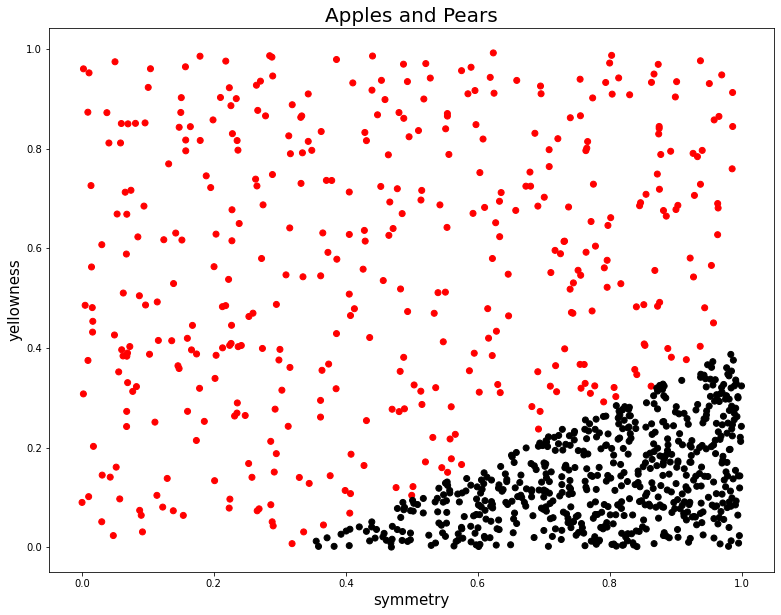

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1)) 

In [ ]:
%%time

neuron = Neuron()
Loss_values = neuron.fit(X, y)

CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 209 ms


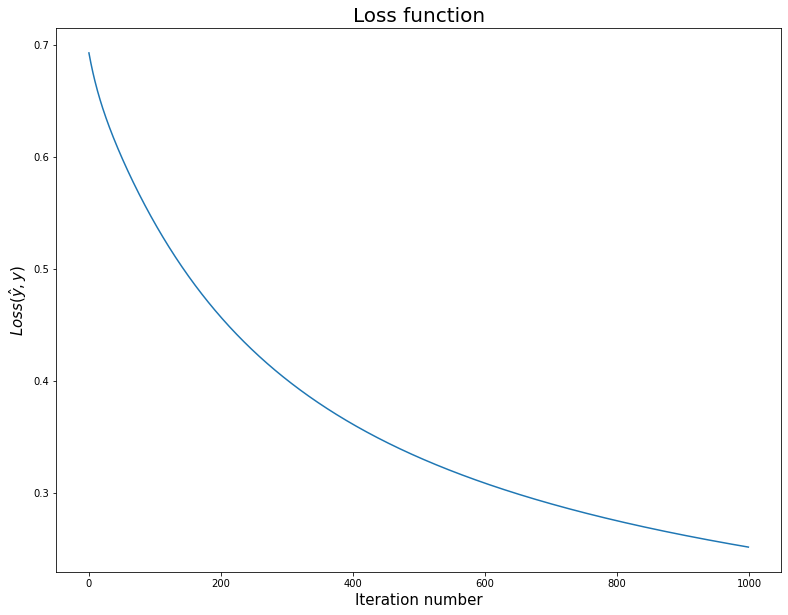

In [ ]:
plt.figure(figsize=(13, 10))
plt.plot(Loss_values)
plt.title('Loss function', fontsize=20)
plt.xlabel('Iteration number', fontsize=15)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=15)
plt.show()

##Полученные результаты

##Попробуем разные значения threshold

### threshold = 0.5

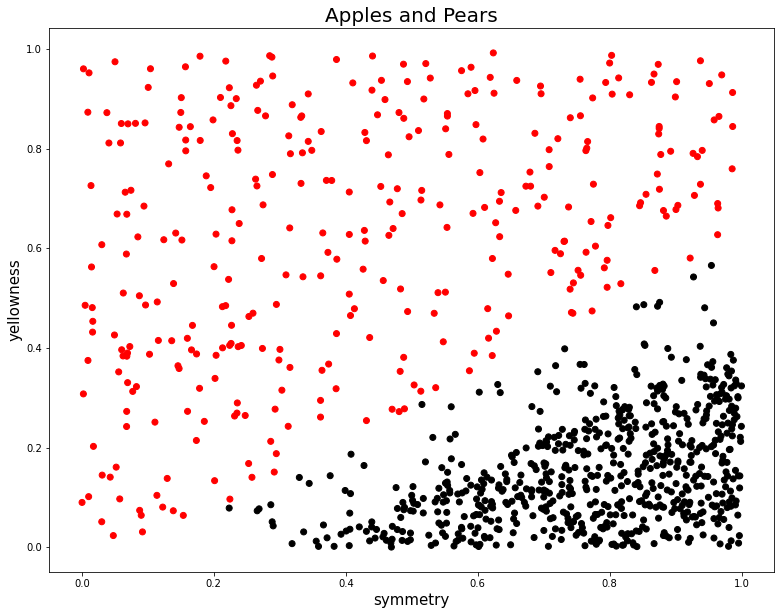

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X)))
print("f1 score: ", f1_score(y, neuron.predict(X)))

accuracy score:  0.933
f1 score:  0.9460981496379727


### threshold = 0.3

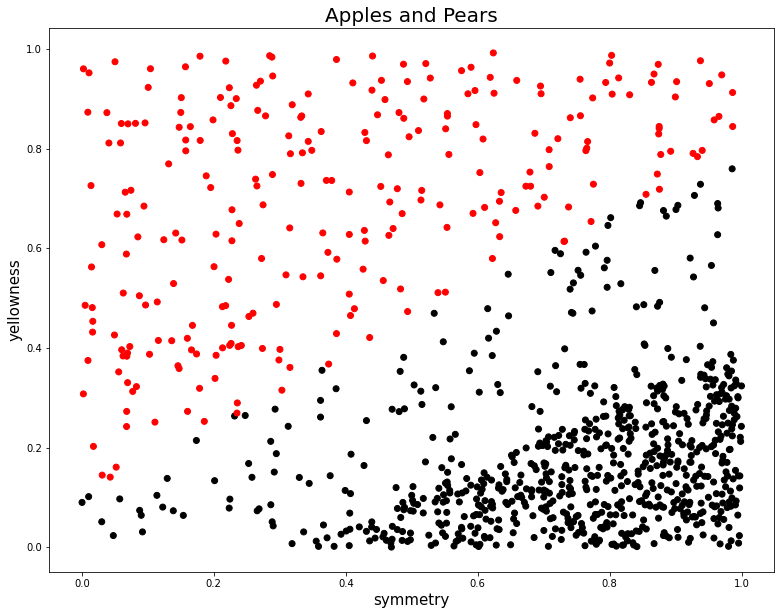

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X, threshold=0.3), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X, threshold=0.3)))
print("f1 score: ", f1_score(y, neuron.predict(X, threshold=0.3)))

accuracy score:  0.853
f1 score:  0.888888888888889


### threshold = 0.7

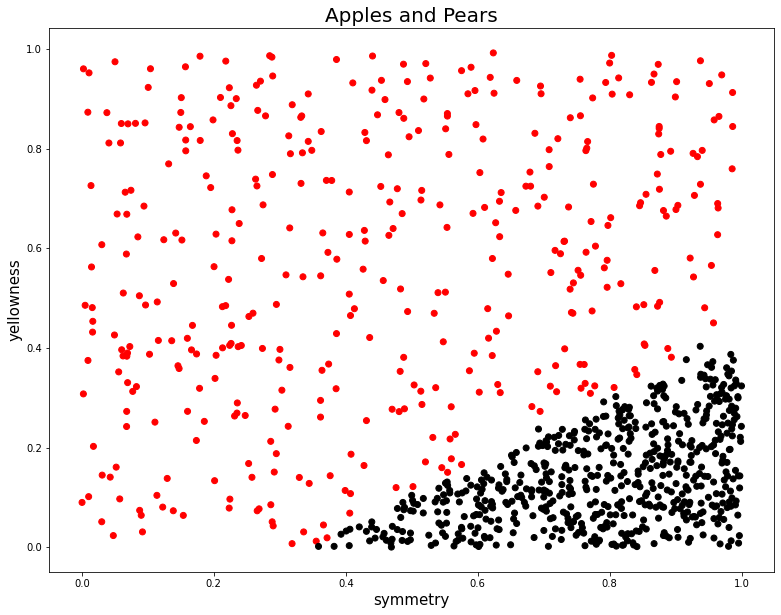

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X, threshold=0.7), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X, threshold=0.7)))
print("f1 score: ", f1_score(y, neuron.predict(X, threshold=0.7)))

accuracy score:  0.991
f1 score:  0.9923793395427604


Видим, что с threshold=0.7 наиболее высокая точность предсказаний.

### В прошлой модели мы использовали количество эпох, указанное по умолчанию (1000). Попробуем увеличить число эпох, к примеру, до 7000.

In [ ]:
%%time

neuron = Neuron()
Loss_values = neuron.fit(X, y, num_epochs=7000)

CPU times: user 1.4 s, sys: 1.98 ms, total: 1.4 s
Wall time: 1.41 s


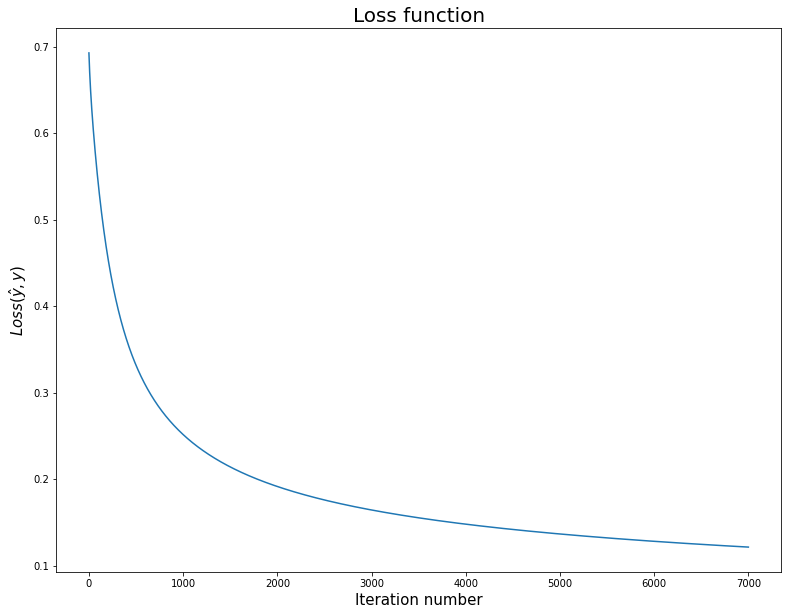

In [ ]:
plt.figure(figsize=(13, 10))
plt.plot(Loss_values)
plt.title('Loss function', fontsize=20)
plt.xlabel('Iteration number', fontsize=15)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=15)
plt.show()

## Попробуем разные значения threshold

### threshold = 0.5

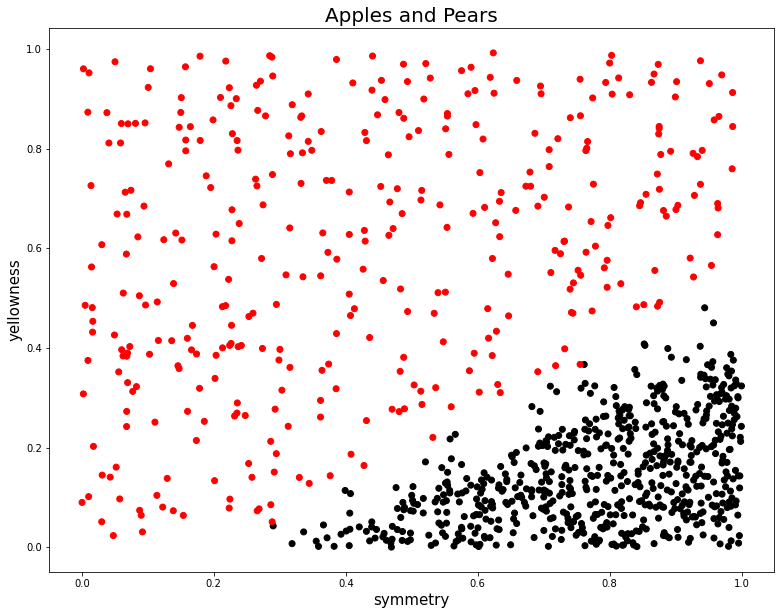

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X)))
print("f1 score: ", f1_score(y, neuron.predict(X)))

accuracy score:  0.959
f1 score:  0.9663105998356615


### threshold = 0.3

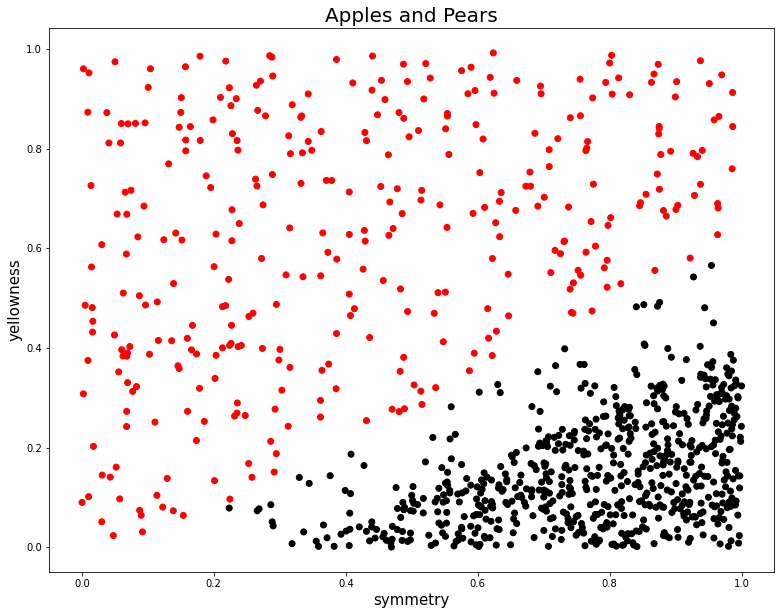

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X, threshold=0.3), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X, threshold=0.3)))
print("f1 score: ", f1_score(y, neuron.predict(X, threshold=0.3)))

accuracy score:  0.934
f1 score:  0.9468599033816426


### threshold = 0.7

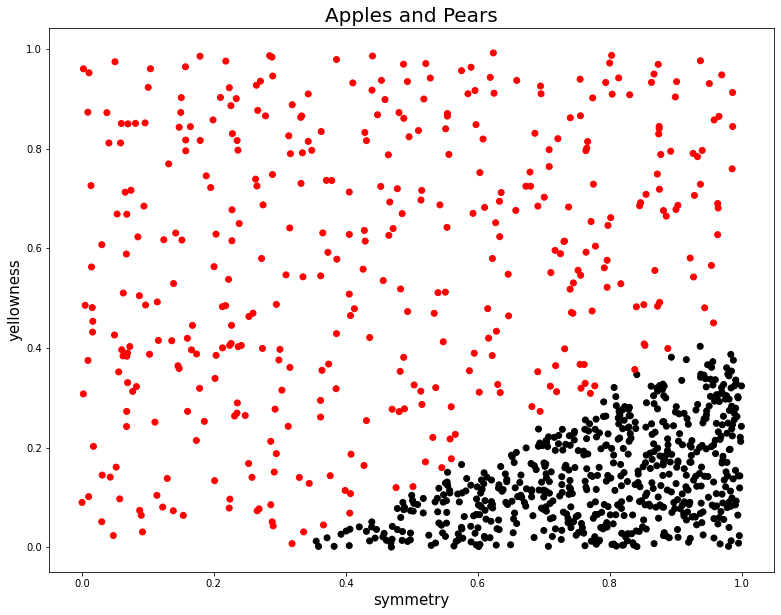

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X, threshold=0.7), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X, threshold=0.7)))
print("f1 score: ", f1_score(y, neuron.predict(X, threshold=0.7)))

accuracy score:  0.988
f1 score:  0.98989898989899


Видим, что с threshold=0.7 наиболее высокая точность предсказаний.

###Теперь посмотрим на графики при num_epochs = 12000

In [ ]:
%%time

neuron = Neuron()
Loss_values = neuron.fit(X, y, num_epochs=12000)

CPU times: user 2.4 s, sys: 3.56 ms, total: 2.4 s
Wall time: 2.41 s


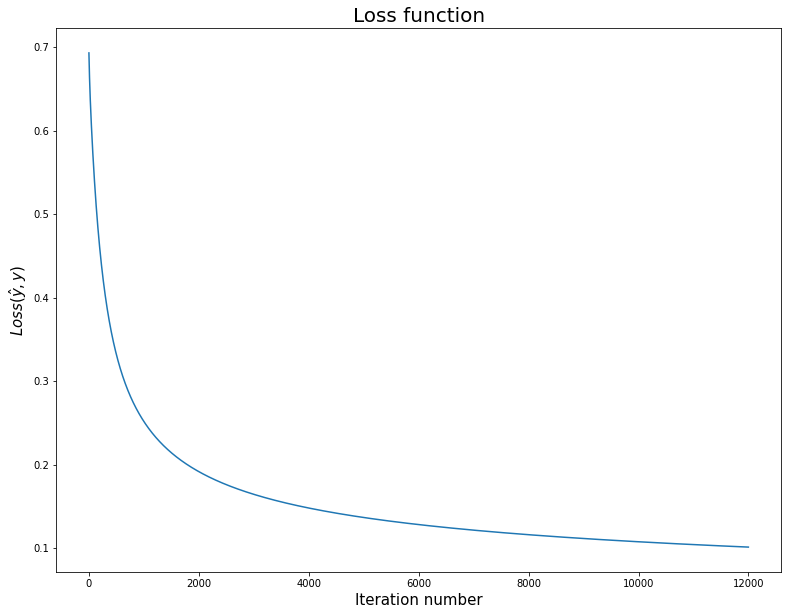

In [ ]:
plt.figure(figsize=(13, 10))
plt.plot(Loss_values)
plt.title('Loss function', fontsize=20)
plt.xlabel('Iteration number', fontsize=15)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=15)
plt.show()

### threshold = 0.5

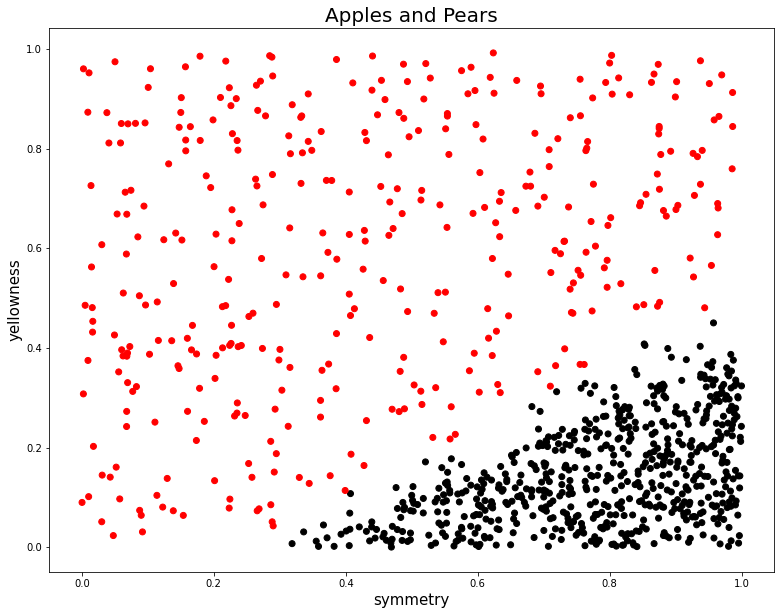

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X)))
print("f1 score: ", f1_score(y, neuron.predict(X)))

accuracy score:  0.966
f1 score:  0.9719008264462811


### threshold = 0.3

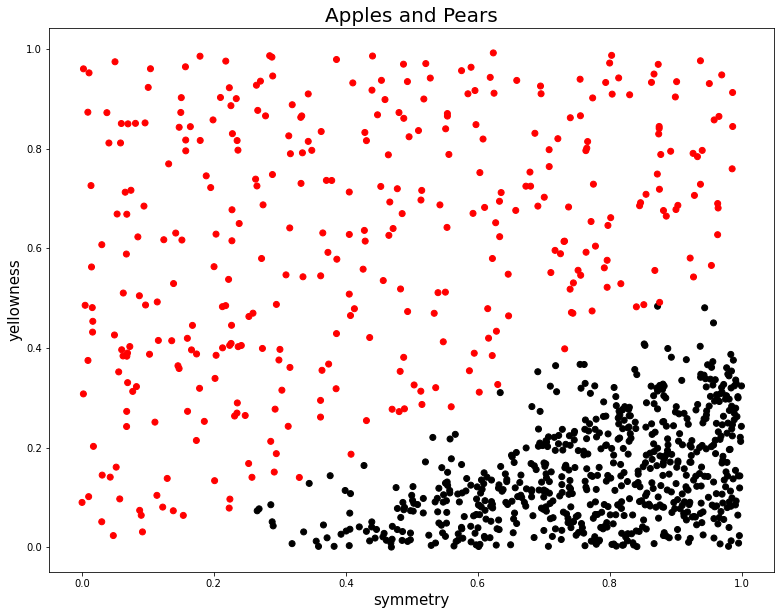

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X, threshold=0.3), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X, threshold=0.3)))
print("f1 score: ", f1_score(y, neuron.predict(X, threshold=0.3)))

accuracy score:  0.946
f1 score:  0.9560975609756098


### threshold = 0.7

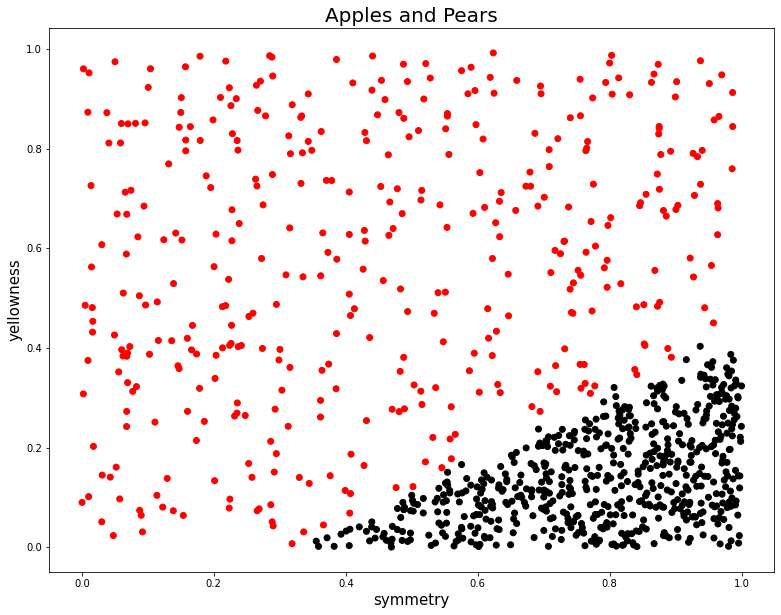

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=neuron.predict(X, threshold=0.7), cmap='flag')
plt.title('Apples and Pears', fontsize=20)
plt.xlabel('symmetry', fontsize=15)
plt.ylabel('yellowness', fontsize=15)
plt.show()

In [ ]:
print("accuracy score: ", accuracy_score(y, neuron.predict(X, threshold=0.7)))
print("f1 score: ", f1_score(y, neuron.predict(X, threshold=0.7)))

accuracy score:  0.99
f1 score:  0.9915682967959528


Видим, что с threshold=0.7 наиболее высокая точность предсказаний (метрики accuracy_score = 0.99 и f1_score = 0.99).

#Голос

In [ ]:
!gdown 1rUTURdK0u3VMvi8n09R2HMDbuk4RC7jS

Downloading...
From: https://drive.google.com/uc?id=1rUTURdK0u3VMvi8n09R2HMDbuk4RC7jS
To: /content/voice.csv
100% 1.07M/1.07M [00:00<00:00, 114MB/s]


In [ ]:
data = pd.read_csv("voice.csv")

## Получим информацию о датасете

In [ ]:
data.info

<bound method DataFrame.info of       meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt  

In [ ]:
data.shape

(3168, 21)

In [ ]:
data.describe

<bound method NDFrame.describe of       meanfreq        sd    median       Q25       Q75       IQR       skew  \
0     0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1     0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2     0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3     0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4     0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   
...        ...       ...       ...       ...       ...       ...        ...   
3163  0.131884  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129   
3164  0.116221  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730   
3165  0.142056  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502   
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029   

             kurt

In [ ]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [ ]:
data.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Предобработка данных

In [ ]:
import pandas as pd
from sklearn import preprocessing

data["label"] = data["label"].apply(lambda x: 1 if x == 'male' else 0)
min_max_scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(min_max_scaler.fit_transform(data))
data = data.sample(frac=1)

In [ ]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1442,0.679187,0.421192,0.679701,0.605088,0.805877,0.270988,0.045218,0.003753,0.755713,0.455136,...,0.679187,0.330920,0.191170,0.990585,0.263620,0.040860,0.217298,0.216738,0.123681,1.0
1739,0.733899,0.122822,0.717893,0.708805,0.722431,0.082208,0.076802,0.007029,0.409140,0.115204,...,0.733899,0.491955,0.034495,0.981526,0.502141,0.384946,0.318799,0.311159,0.304500,0.0
2185,0.666783,0.487394,0.699670,0.610753,0.806636,0.265834,0.034282,0.002000,0.851201,0.703701,...,0.666783,0.469245,0.191170,0.999749,0.402705,0.040860,0.439242,0.438841,0.096554,0.0
1001,0.781923,0.418838,0.833182,0.647945,0.913657,0.330965,0.032438,0.001493,0.713405,0.356645,...,0.781923,0.342391,0.191170,0.963717,0.411808,0.040860,0.501430,0.501073,0.078482,1.0
2318,0.850091,0.374594,0.852013,0.788550,0.964184,0.233778,0.067263,0.007081,0.574855,0.366671,...,0.850091,0.582914,0.213898,0.937749,0.316131,0.040860,0.398499,0.398069,0.066491,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train = data.iloc[:int(len(data)*0.7), :-1] 
y_train = data.iloc[:int(len(data)*0.7), -1]  

X_test = data.iloc[int(len(data)*0.7):, :-1] 
y_test = data.iloc[int(len(data)*0.7):, -1]  

# Обучение модели

## Наш нейрон, 100 эпох

In [ ]:
neuron = Neuron()
hist1 = neuron.fit(X_train.values, y_train.values, num_epochs=100)

### threshold = 0.5

In [ ]:
print('Accuracy_score нейрона c 100 эпохами и threshold=0.5: {:.3f} %'.format(
    accuracy_score(y_test.values, neuron.predict(X_test.values)) * 100))

Accuracy_score нейрона c 100 эпохами и threshold=0.5: 78.444 %


### threshold = 0.3

In [ ]:
print('Accuracy_score нейрона c 100 эпохами и threshold=0.3: {:.3f} %'.format(
    accuracy_score(y_test.values, neuron.predict(X_test.values, threshold=0.3)) * 100))

Accuracy_score нейрона c 100 эпохами и threshold=0.3: 57.518 %


### threshold = 0.7

In [ ]:
print('Accuracy_score нейрона c 100 эпохами и threshold=0.7: {:.3f} %'.format(
    accuracy_score(y_test.values, neuron.predict(X_test.values, threshold=0.7)) * 100))

Accuracy_score нейрона c 100 эпохами и threshold=0.7: 48.475 %


## Наш нейрон, 1000 эпох

In [ ]:
neuron = Neuron()
hist2 = neuron.fit(X_train.values, y_train.values, num_epochs=1000)

### threshold = 0.5

In [ ]:
print('Accuracy_score нейрона c 1000 эпохами и threshold=0.5: {:.3f} %'.format(
    accuracy_score(y_test.values, neuron.predict(X_test.values)) * 100))

Accuracy_score нейрона c 1000 эпохами и threshold=0.5: 91.377 %


### threshold = 0.3

In [ ]:
print('Accuracy_score нейрона c 1000 эпохами и threshold=0.3: {:.3f} %'.format(
    accuracy_score(y_test.values, neuron.predict(X_test.values, threshold=0.3)) * 100))

Accuracy_score нейрона c 1000 эпохами и threshold=0.3: 85.489 %


### threshold = 0.7

In [ ]:
print('Accuracy_score нейрона c 1000 эпохами и threshold=0.7: {:.3f} %'.format(
    accuracy_score(y_test.values, neuron.predict(X_test.values, threshold=0.7)) * 100))

Accuracy_score нейрона c 1000 эпохами и threshold=0.7: 77.392 %


## Встроенный перцептрон, 100 эпох

In [ ]:
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(random_state=42, max_iter=100)
sk_perceptron.fit(X_train.values, y_train.values)

Perceptron(max_iter=100, random_state=42)

In [ ]:
print('Accuracy_score перцептрона из sklearn за 100 эпох: {:.3f} %'.format(
    accuracy_score(y_test.values, sk_perceptron.predict(X_test.values)) * 100))

Accuracy_score перцептрона из sklearn за 100 эпох: 95.268 %


## Встроенный перцептрон, 1000 эпох

In [ ]:
sk_perceptron = Perceptron(random_state=42, max_iter=1000)
sk_perceptron.fit(X_train.values, y_train.values)

Perceptron(random_state=42)

In [ ]:
print('Accuracy_score перцептрона из sklearn за 1000 эпох: {:.3f} %'.format(
    accuracy_score(y_test.values, sk_perceptron.predict(X_test.values)) * 100))

Accuracy_score перцептрона из sklearn за 1000 эпох: 95.268 %


## Вывод
Наилучшее значение метрики accuracy_score показал встроенный в sklearn перцептрон.Accuracy_score перцептрона из sklearn за 1000 эпох: 94.111 %. 
Наилучшее значение метрики accuracy_score, которого добился наш нейрон: Accuracy_score нейрона c 1000 эпохами и threshold=0.5: 90.852 %, что можно считать неплохим результатом.